In [1]:
%%bash
make run

rm -f bin/*.exe
rm -f build/*.o
rm -f /*.exe
rm -f data/*.txt
gcc -I include -O3 -march=native -flto -ftree-parallelize-loops=8 -c -o build/chi.o src/chi.c
gcc -I include -O3 -march=native -flto -ftree-parallelize-loops=8 -c -o build/dispersion.o src/dispersion.c
gcc -I include -O3 -march=native -flto -ftree-parallelize-loops=8 -c -o build/main.o src/main.c
gcc -I include -O3 -march=native -flto -ftree-parallelize-loops=8 -c -o build/mathroutines.o src/mathroutines.c
gcc -I include -O3 -march=native -flto -ftree-parallelize-loops=8 -c -o build/polylog.o src/polylog.c
gcc -I include -O3 -march=native -flto -ftree-parallelize-loops=8 -o bin/main.exe build/chi.o build/dispersion.o build/main.o build/mathroutines.o build/polylog.o -lgsl -lgslcblas -lm
for r in 4 6 8; do \
	for lambda in 1e-6 0.01 0.02; do \
		./bin/main.exe $r 0.01 0 $lambda; \
	done \
done
./bin/main.exe 6 0.01 0 0.1; for w = 1.000000e-11: 4.607075e-01, chi = -2.885770e-03, f = -1.868800e+022q = 7.000e-02, bisection est f

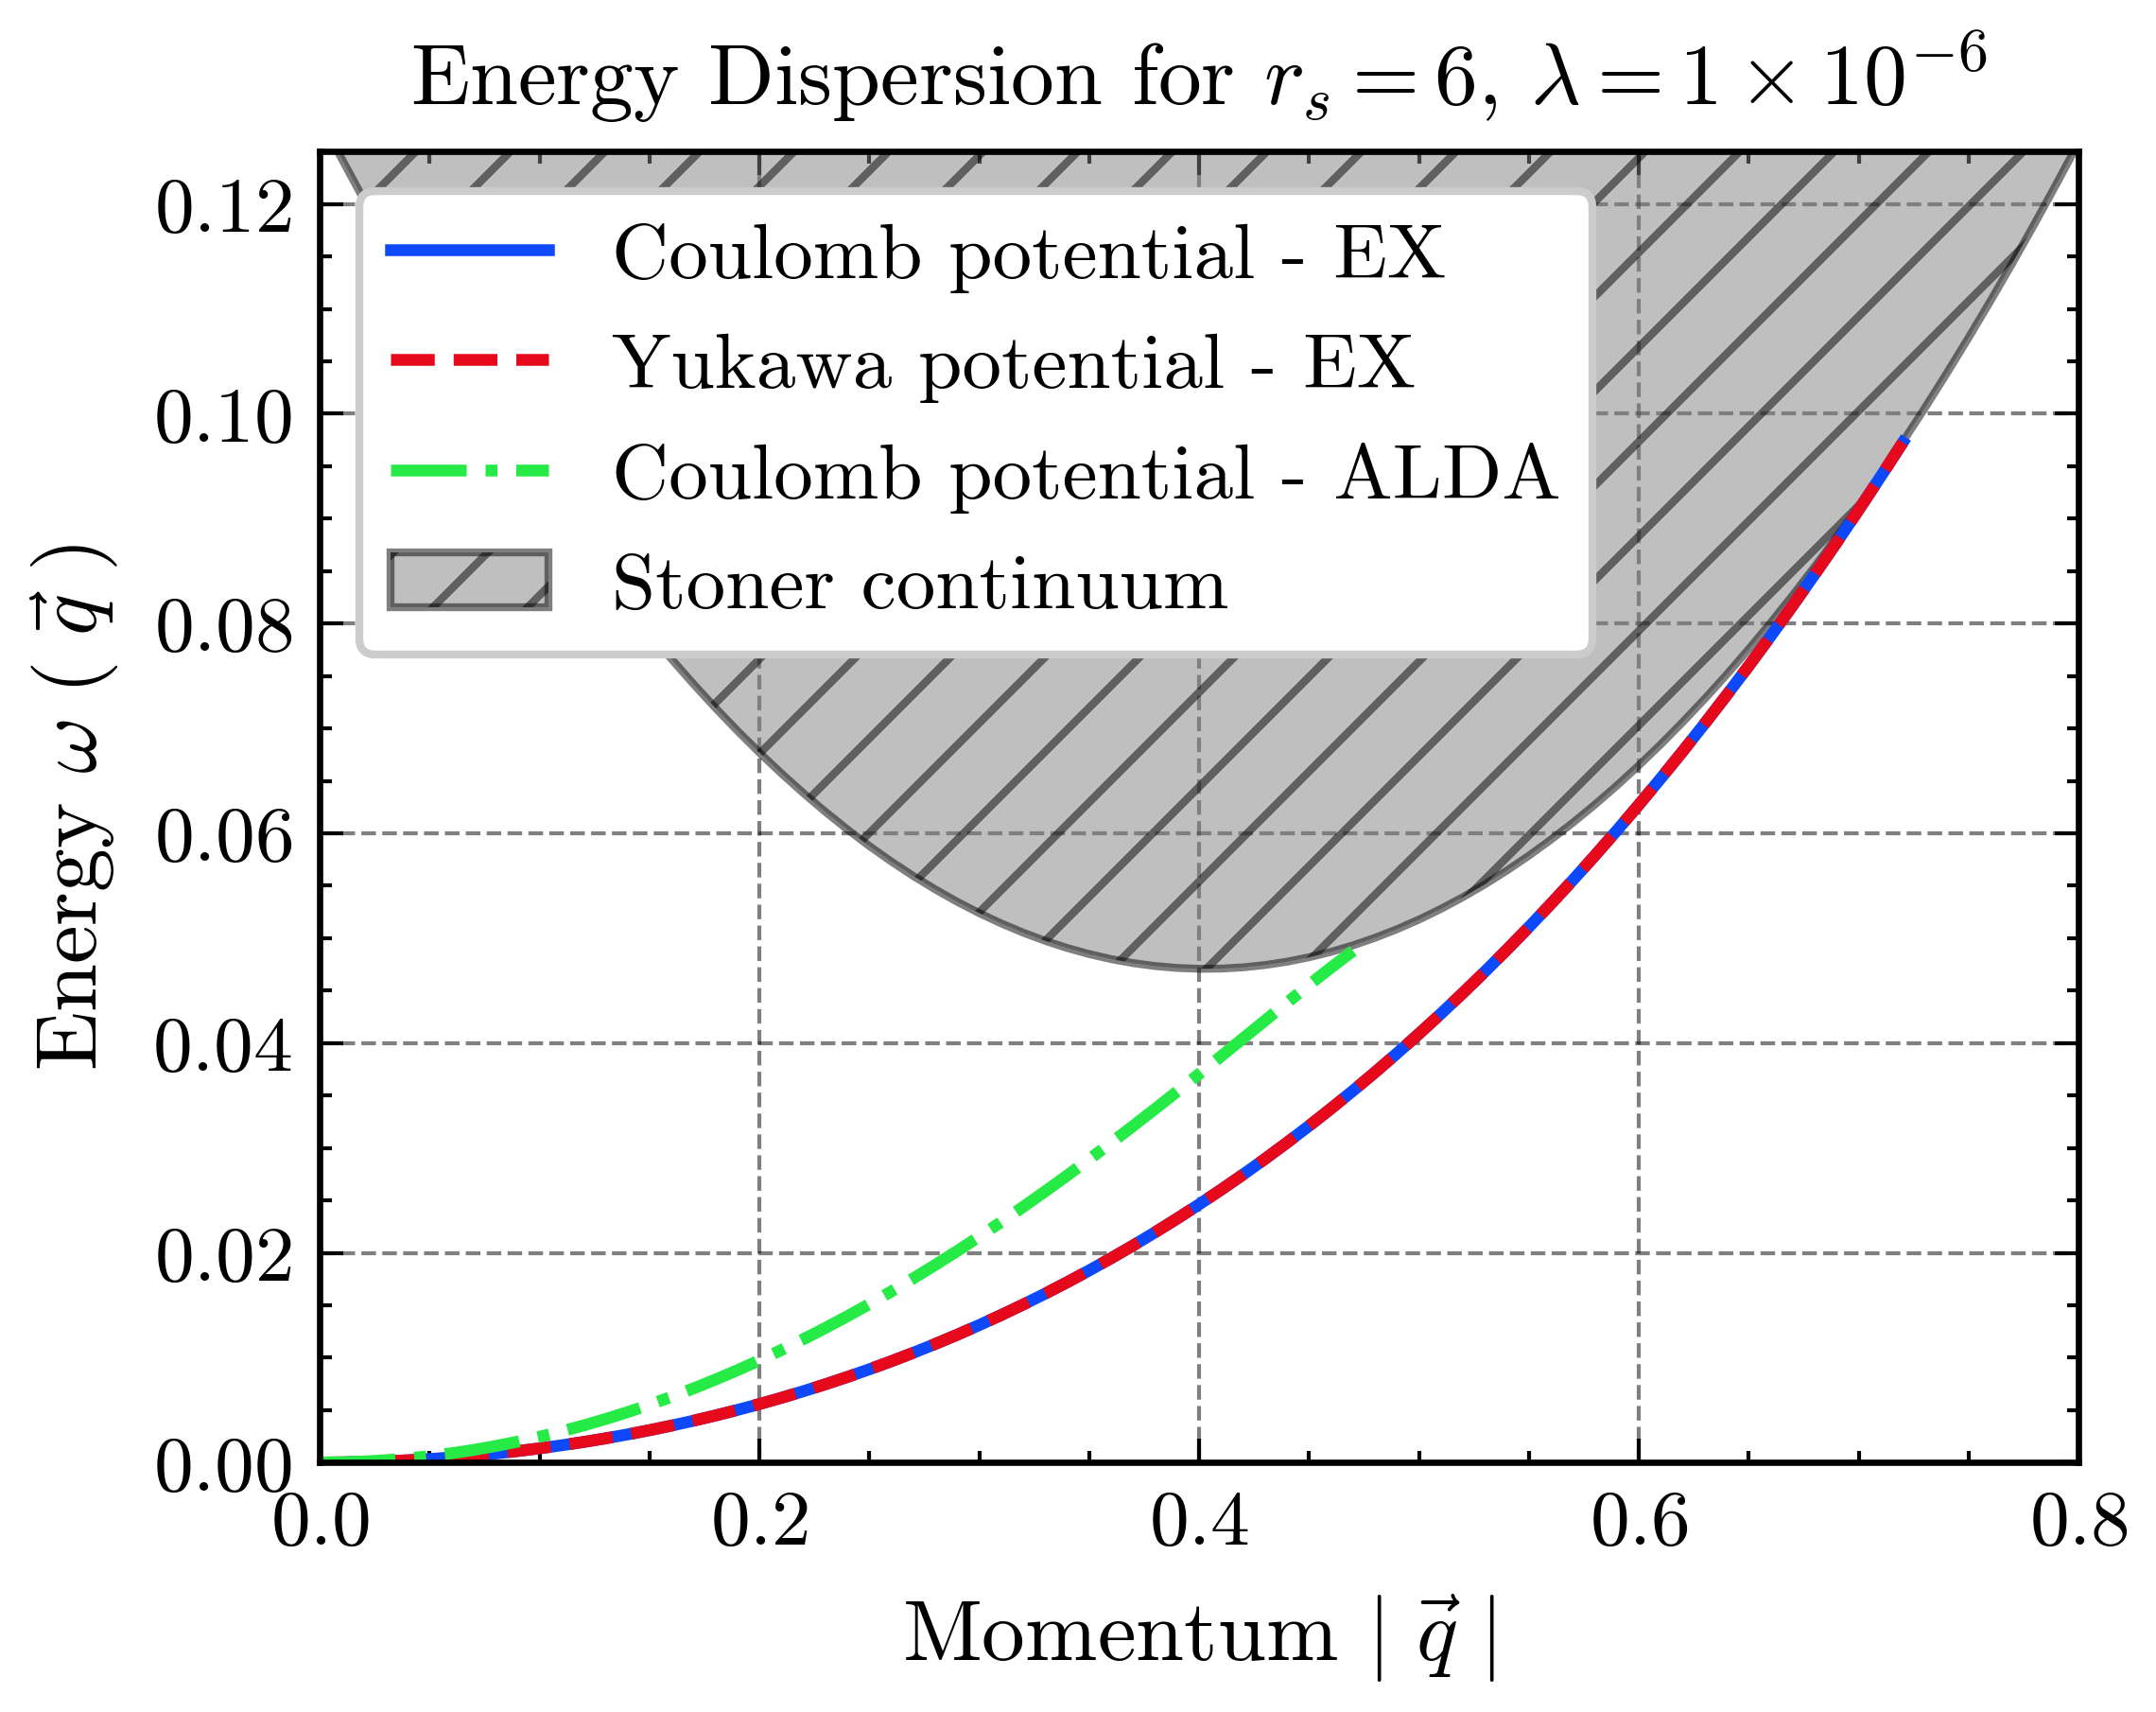

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import linregress
#custom style sheet
plt.style.use('./thesis.mplstyle')


# plot for rs = 6, lambda = 1e-3
datadir = os.path.join(os.getcwd(), "data")
new_data = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-06_pert.txt", comments='#', delimiter=",")
reference_data_alda = np.loadtxt(datadir + r"/rs_6.000_alda_ref.txt", comments='#', delimiter=",")
stoner_continuum = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-06_stoner.txt", comments='#', delimiter=",")
reference_data = np.loadtxt(datadir + r"/rs_6.000_pert_ref.txt", comments='#', delimiter=",")
plt.plot(reference_data[:,0],reference_data[:,1],label = 'Coulomb potential - EX')
plt.plot(new_data[:,0],new_data[:,1],label = 'Yukawa potential - EX')
plt.plot(reference_data_alda[:,0],reference_data_alda[:,1],label = 'Coulomb potential - ALDA')
plt.fill_between(stoner_continuum[:,0],stoner_continuum[:,1],stoner_continuum[:,2],alpha = 0.5,facecolor='grey', hatch='//', edgecolor='k',label='Stoner continuum')
plt.ylim(0,0.125)
plt.xlim(0,0.8)
plt.xlabel(r"Momentum $|~\vec{q}~|$")
plt.ylabel(r"Energy $\omega~(~\vec{q}~)$")
plt.title(r'Energy Dispersion for $r_s = 6$, $\lambda = 1 \times 10^{-6}$')
plt.legend(loc="upper left")
plt.savefig("plots/comparison.pdf")
plt.show()

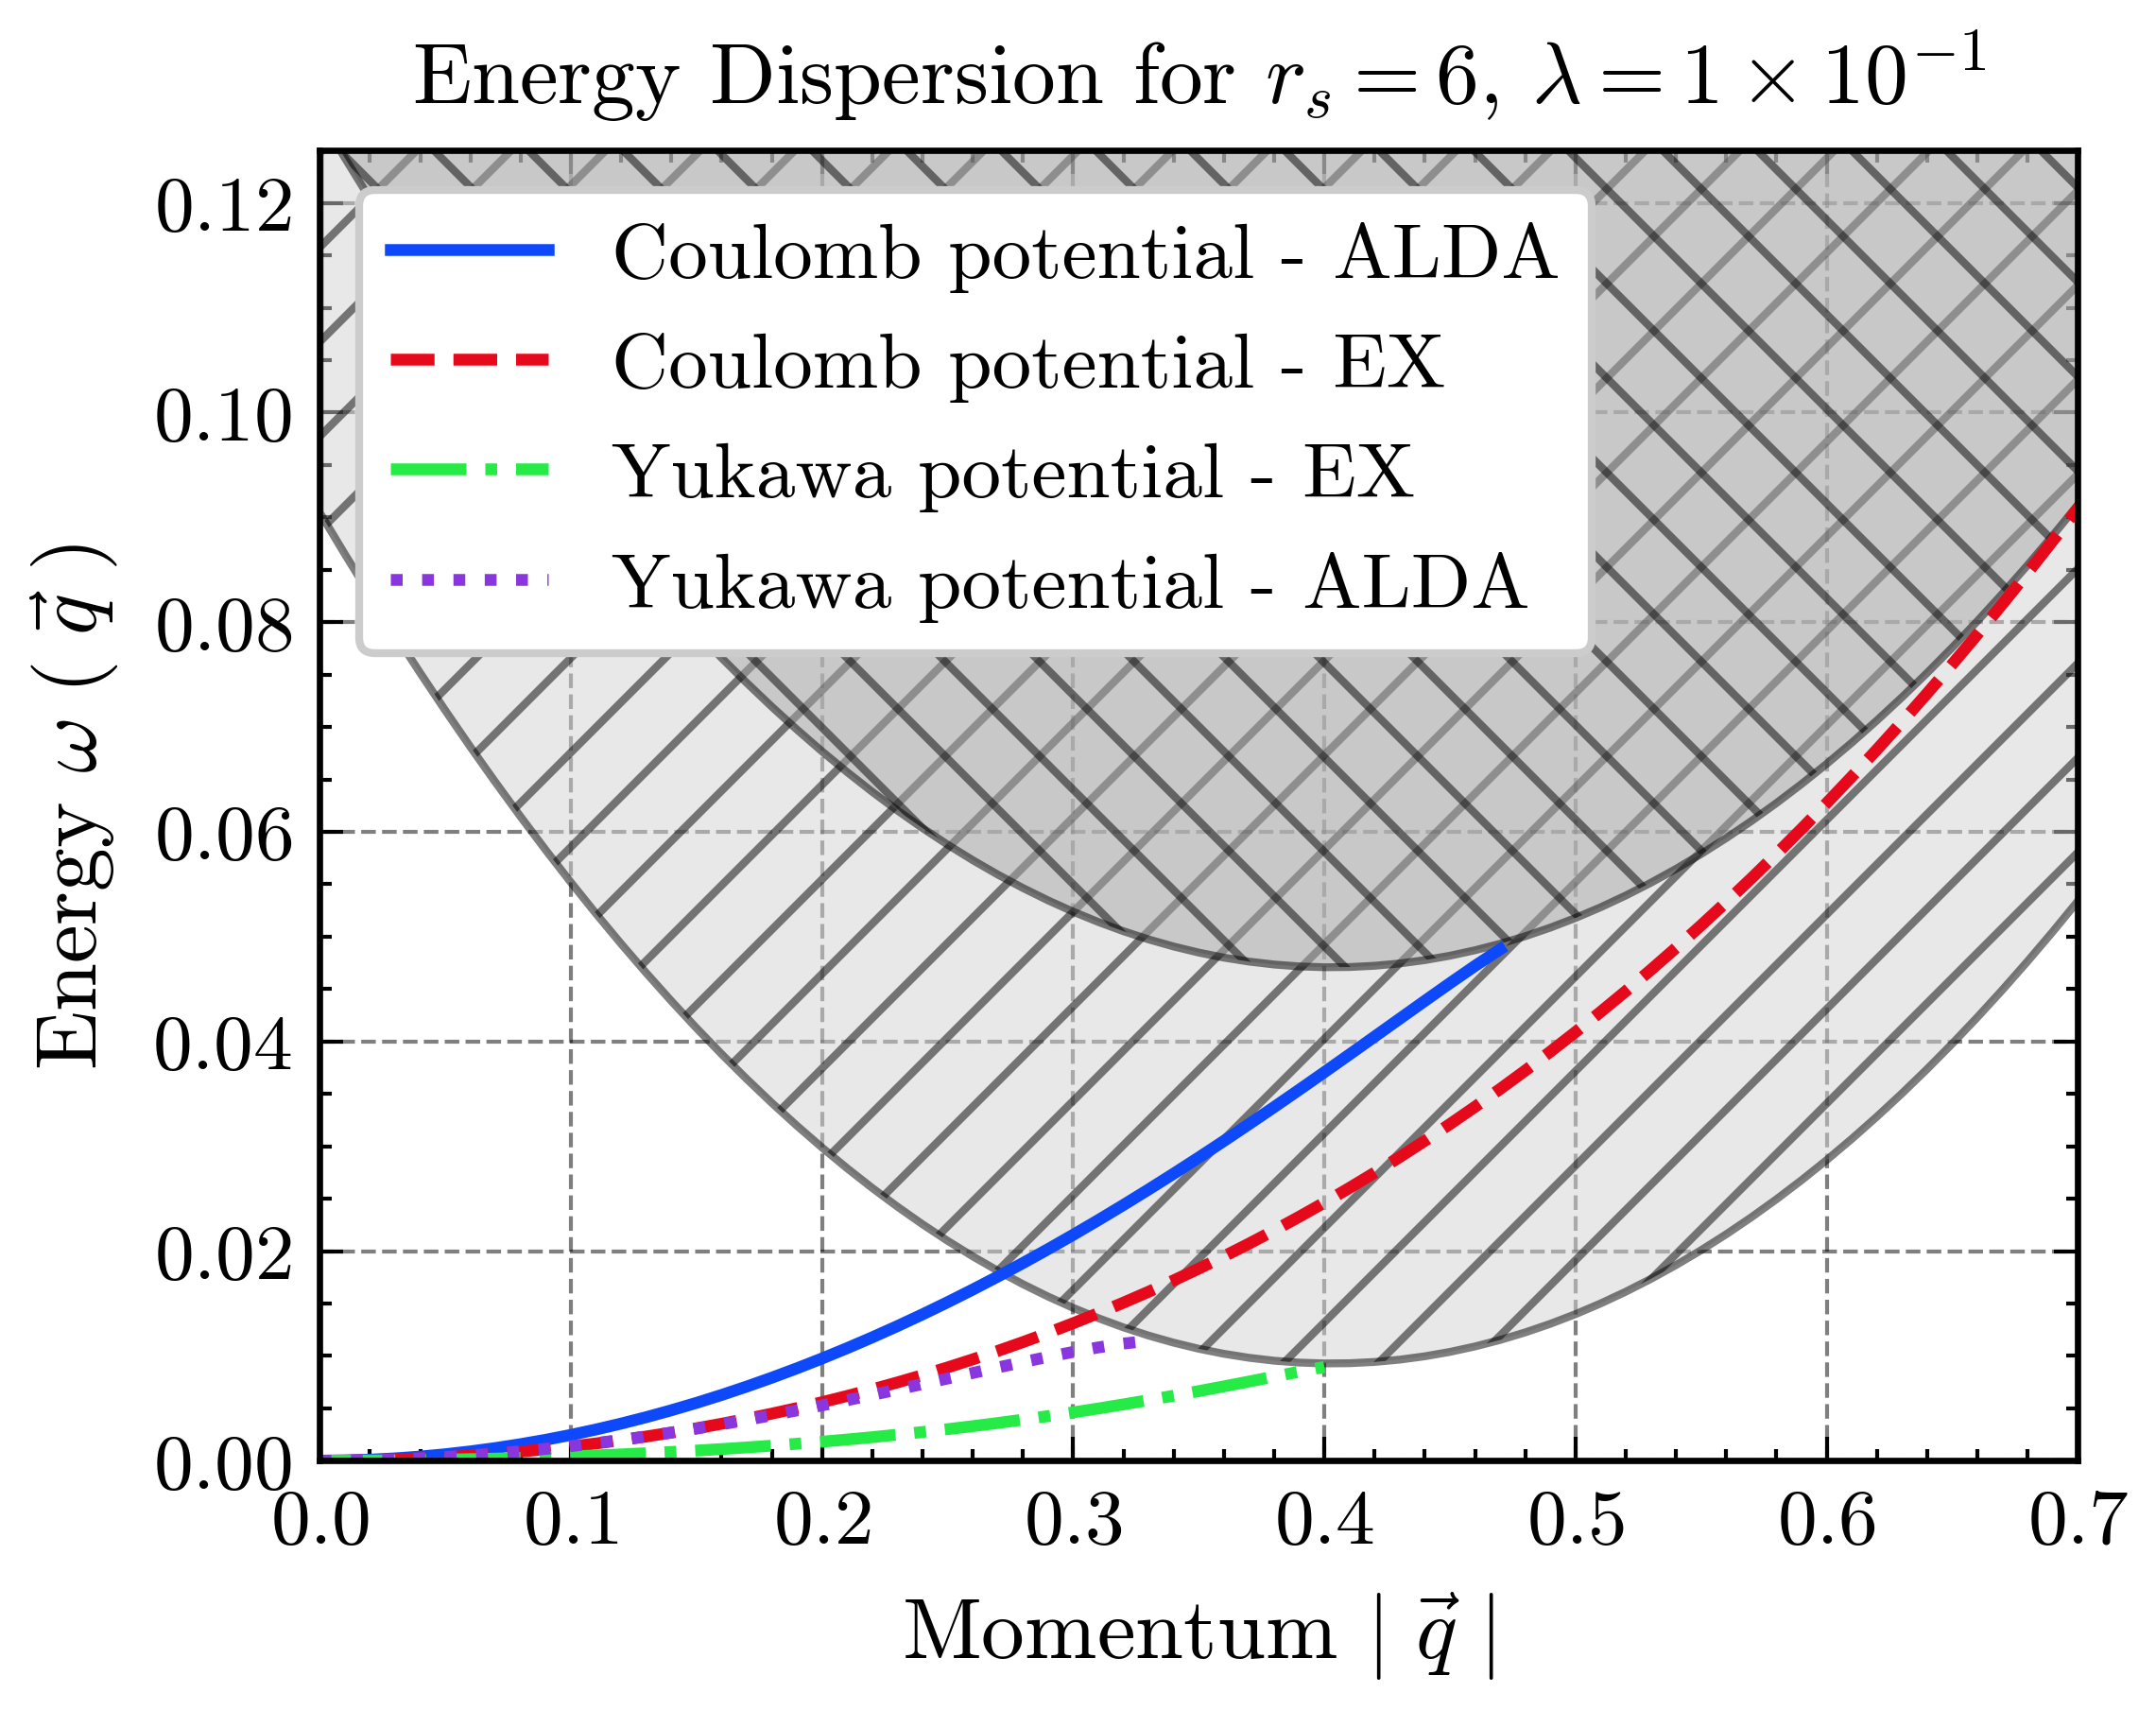

In [3]:
# plot for rs = 6, lambda = 1e-1
datadir = os.path.join(os.getcwd(), "data")
stoner_continuum = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-01_stoner.txt", comments='#', delimiter=",")
stoner_continuum_ref = np.loadtxt(datadir + r"/rs_6.000e+00_stoner_ref.txt", comments='#', delimiter=",")
#new_data = np.loadtxt(datadir + r"/rs_6.000_pert_ref.txt", comments='#', delimiter=",")
new_data = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-01_pert.txt", comments='#', delimiter=",")
new_data_alda = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-01_alda.txt", comments='#', delimiter=",")
reference_data_alda = np.loadtxt(datadir + r"/rs_6.000_alda_ref.txt", comments='#', delimiter=",")
reference_data = np.loadtxt(datadir + r"/rs_6.000_pert_ref.txt", comments='#', delimiter=",")
plt.plot(reference_data_alda[:,0],reference_data_alda[:,1],label = 'Coulomb potential - ALDA')
plt.plot(reference_data[:,0],reference_data[:,1],label = 'Coulomb potential - EX')
plt.plot(new_data[:,0],new_data[:,1],label = 'Yukawa potential - EX')
plt.plot(new_data_alda[:,0],new_data_alda[:,1],label = 'Yukawa potential - ALDA')
plt.fill_between(stoner_continuum[:,0],stoner_continuum[:,1],stoner_continuum_ref[:,2],alpha = 0.5,facecolor='lightgrey', hatch='//', edgecolor='k')
plt.fill_between(stoner_continuum_ref[:,0],stoner_continuum_ref[:,1],stoner_continuum_ref[:,2],alpha = 0.5,facecolor='darkgrey', hatch=r'\\', edgecolor='k')
plt.ylim(0,0.125)
plt.xlim(0,0.7)
plt.xlabel(r"Momentum $|~\vec{q}~|$")
plt.ylabel(r"Energy $\omega~(~\vec{q}~)$")
plt.title(r'Energy Dispersion for $r_s = 6$, $\lambda = 1 \times 10^{-1}$')
plt.legend(loc="upper left")
plt.savefig("plots/largeLam_r6.pdf")
plt.show()

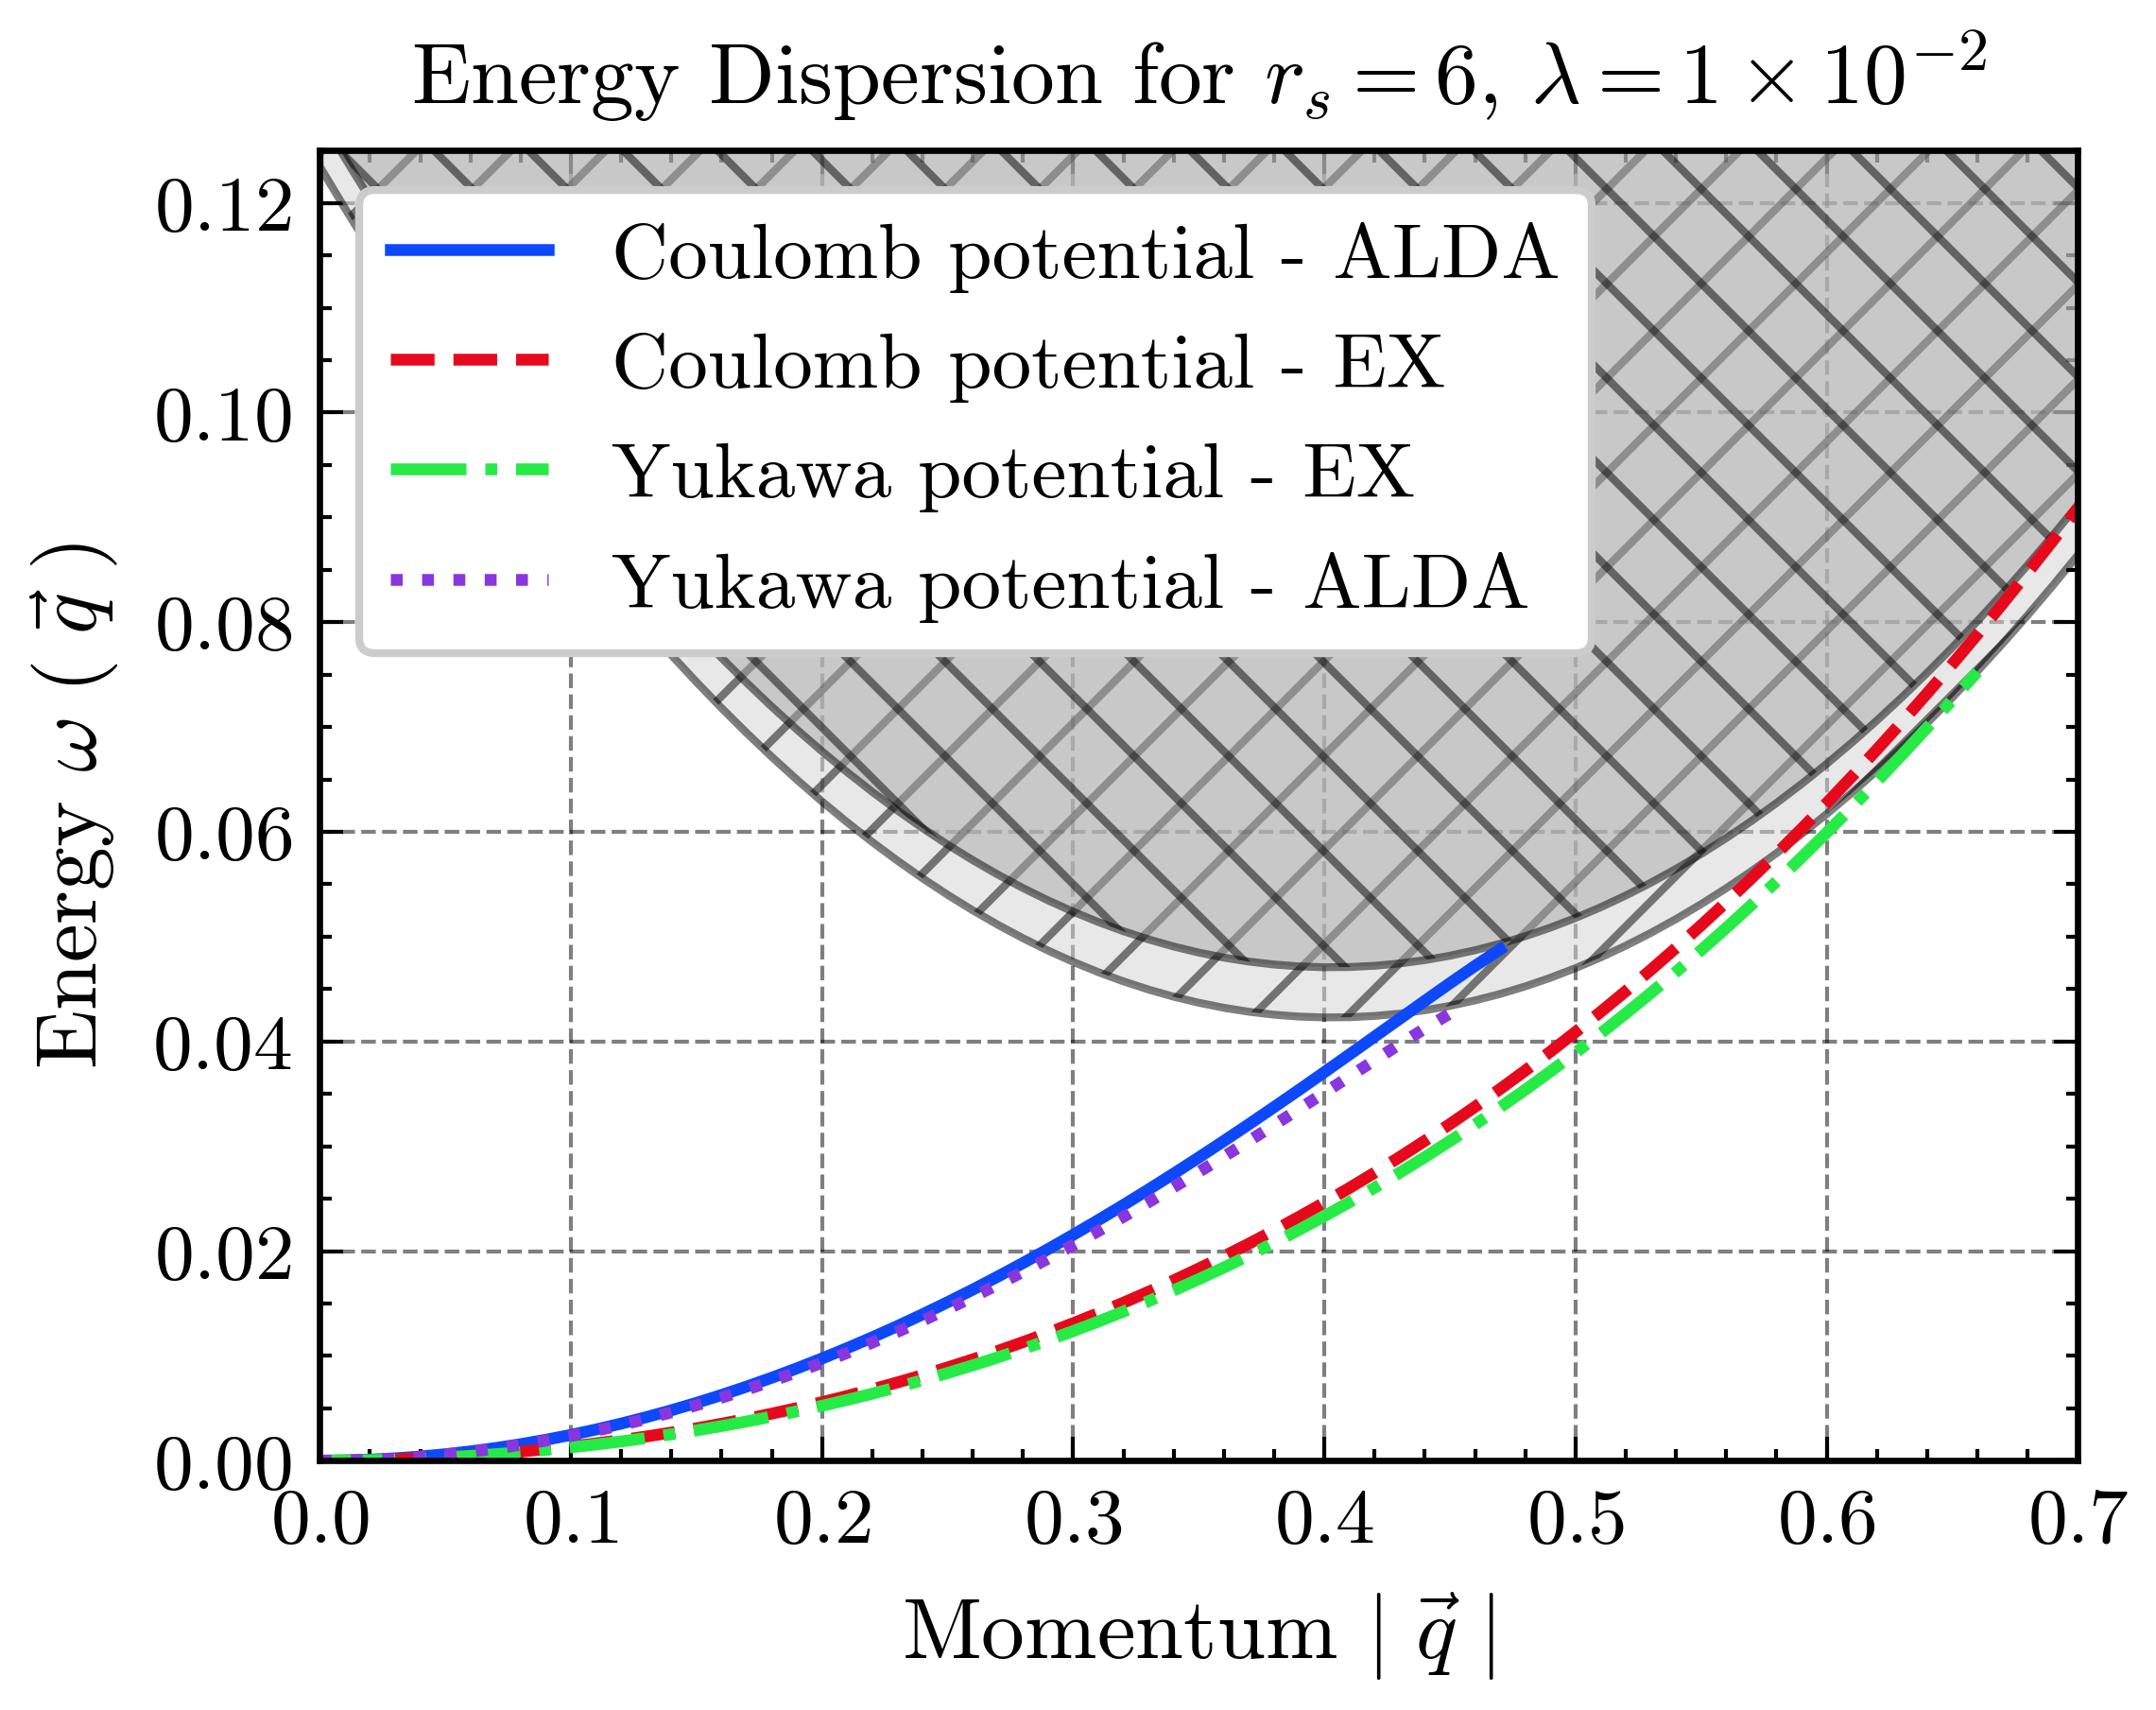

In [4]:
# plot for rs = 6, lambda = 1e-2
stoner_continuum = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-02_stoner.txt", comments='#', delimiter=",")
stoner_continuum_ref = np.loadtxt(datadir + r"/rs_6.000e+00_stoner_ref.txt", comments='#', delimiter=",")
#new_data = np.loadtxt(datadir + r"/rs_6.000_pert_ref.txt", comments='#', delimiter=",")
new_data = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-02_pert.txt", comments='#', delimiter=",")
new_data_alda = np.loadtxt(datadir + r"/rs_6.000_lambda_1.000e-02_alda.txt", comments='#', delimiter=",")
reference_data_alda = np.loadtxt(datadir + r"/rs_6.000_alda_ref.txt", comments='#', delimiter=",")
reference_data = np.loadtxt(datadir + r"/rs_6.000_pert_ref.txt", comments='#', delimiter=",")
plt.plot(reference_data_alda[:,0],reference_data_alda[:,1],label = 'Coulomb potential - ALDA')
plt.plot(reference_data[:,0],reference_data[:,1],label = 'Coulomb potential - EX')
plt.plot(new_data[:,0],new_data[:,1],label = 'Yukawa potential - EX')
plt.plot(new_data_alda[:,0],new_data_alda[:,1],label = 'Yukawa potential - ALDA')
plt.fill_between(stoner_continuum[:,0],stoner_continuum[:,1],stoner_continuum_ref[:,2],alpha = 0.5,facecolor='lightgrey', hatch='//', edgecolor='k')
plt.fill_between(stoner_continuum_ref[:,0],stoner_continuum_ref[:,1],stoner_continuum_ref[:,2],alpha = 0.5,facecolor='darkgrey', hatch=r'\\', edgecolor='k')
plt.ylim(0,0.125)
plt.xlim(0,0.7)
plt.xlabel(r"Momentum $|~\vec{q}~|$")
plt.ylabel(r"Energy $\omega~(~\vec{q}~)$")
plt.title(r'Energy Dispersion for $r_s = 6$, $\lambda = 1 \times 10^{-2}$')
plt.legend(loc="upper left")
plt.savefig("plots/smallLam_r6.pdf")
plt.show()

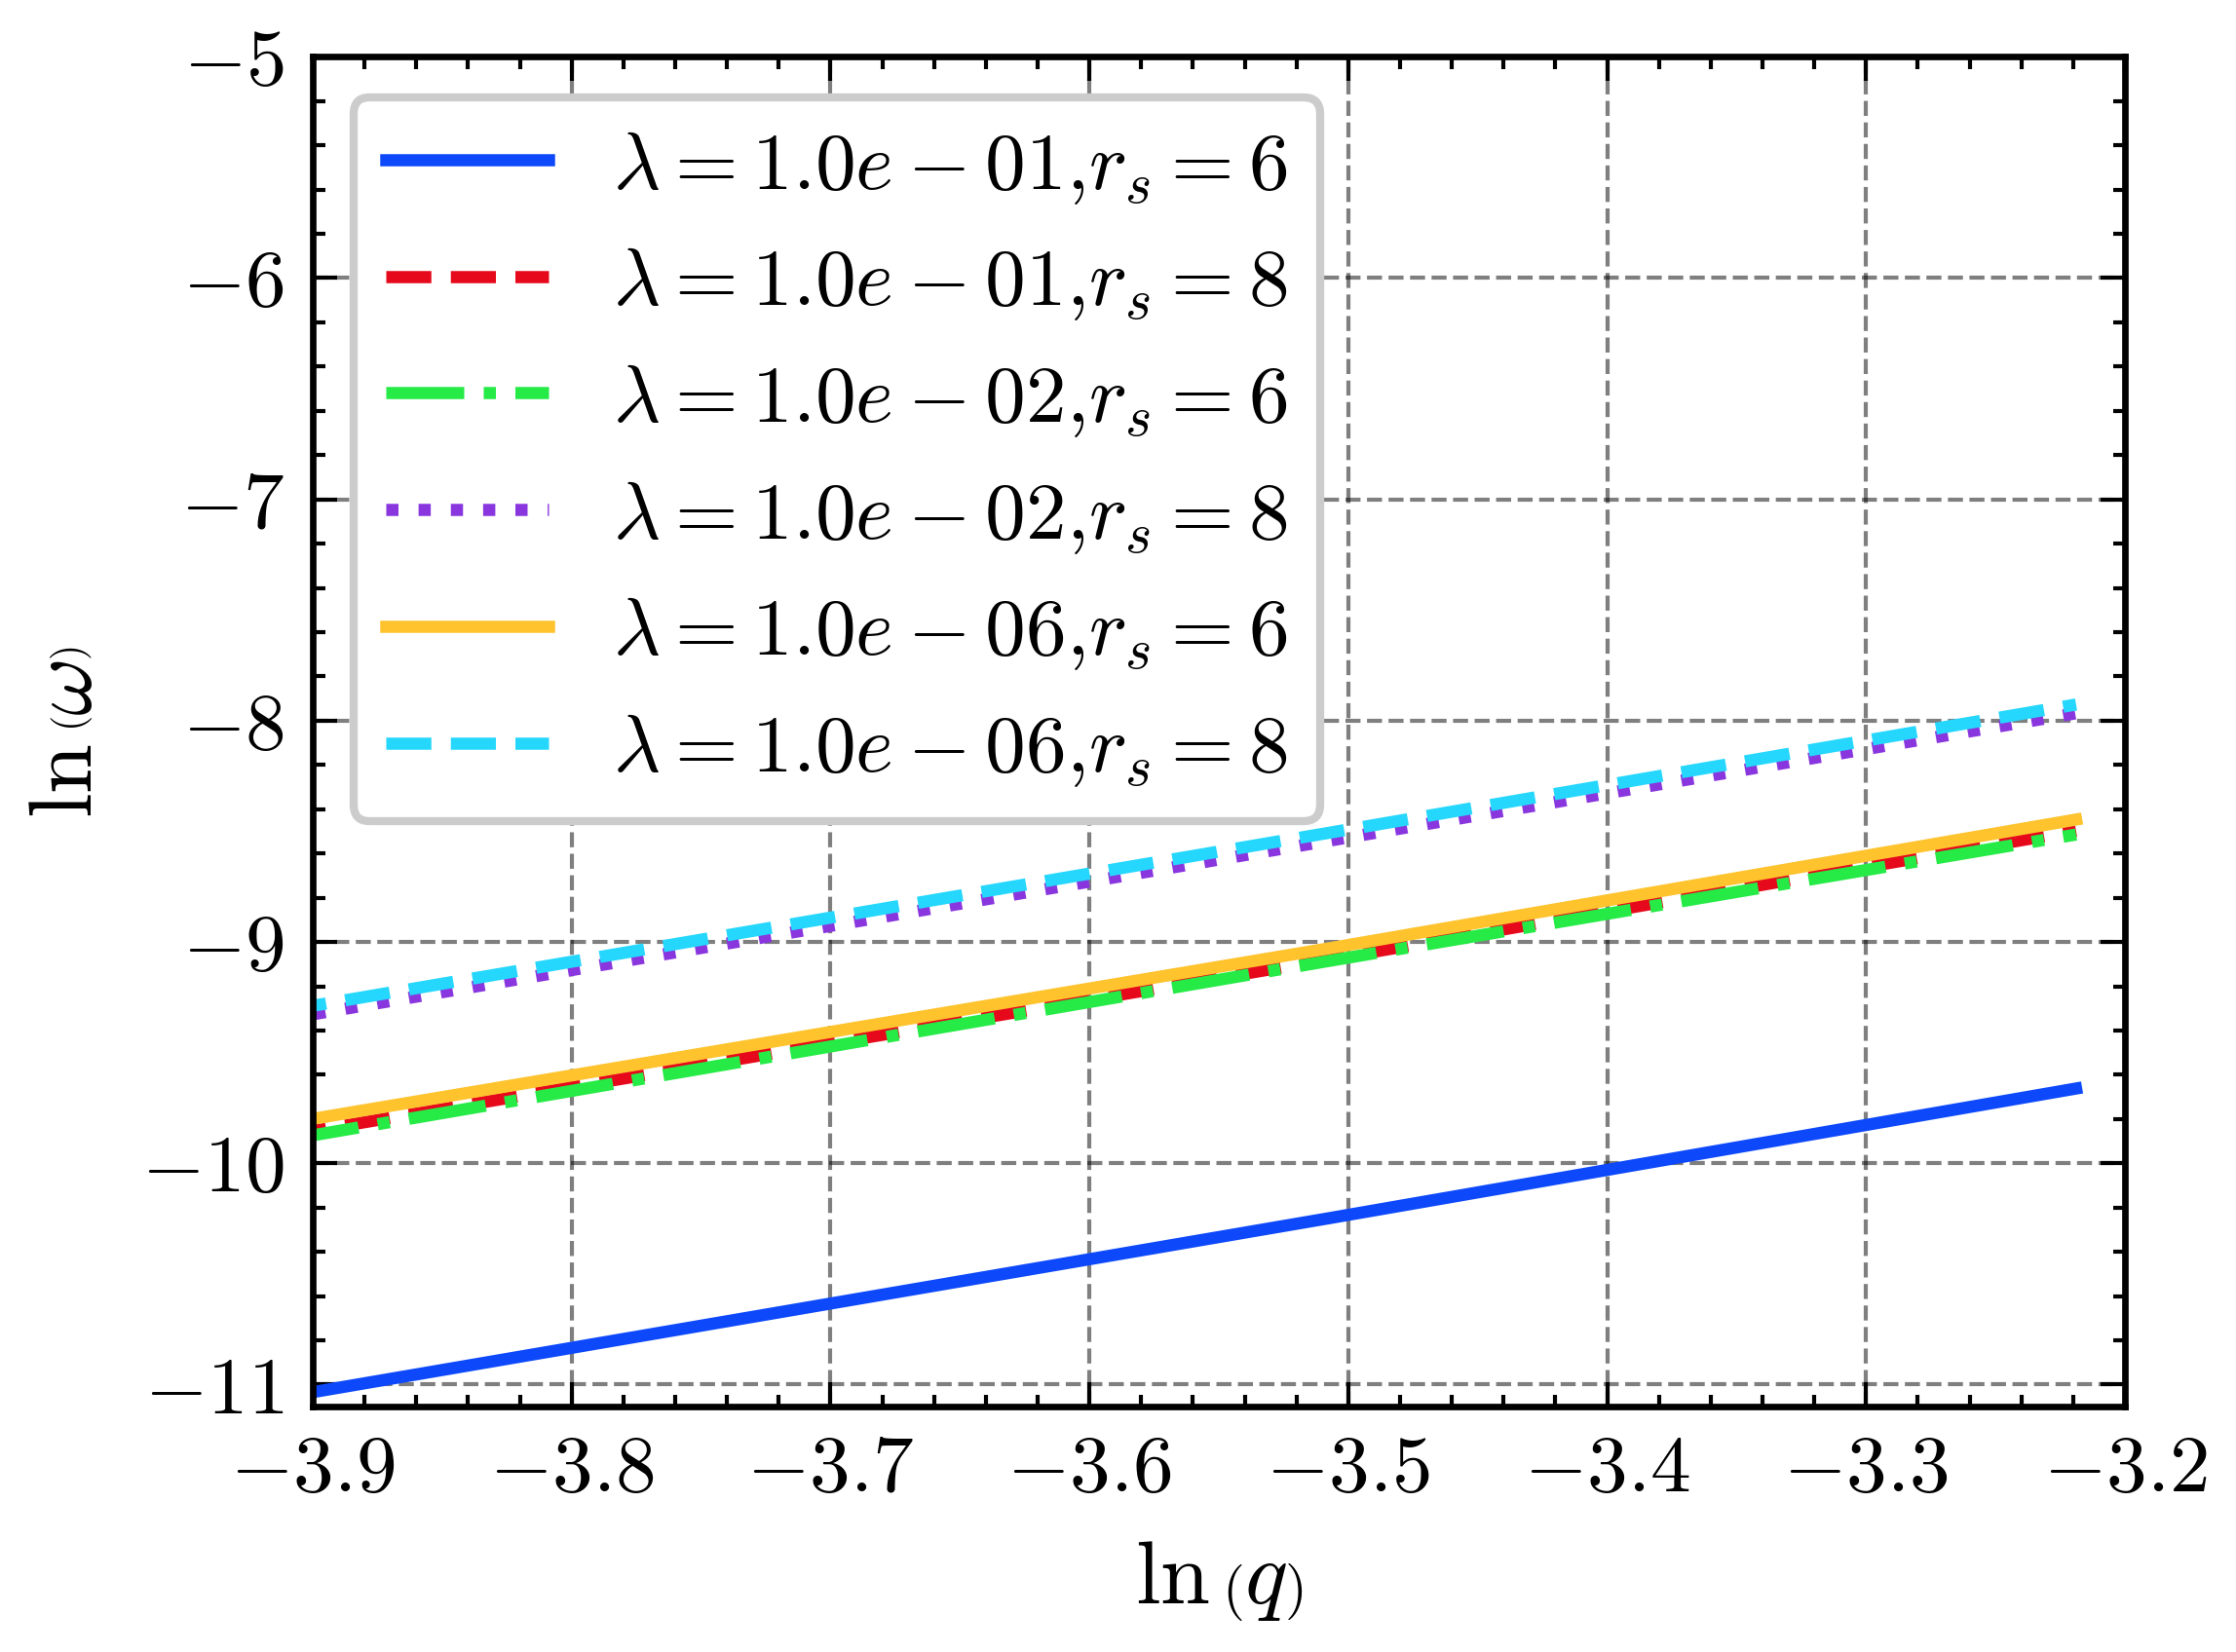

[(0.04143875517985655, -0.025161866648748123, 0.1, 6), (0.12293280352904476, -0.023471595879284674, 0.1, 8), (0.12416763779557524, -0.016766675511956566, 0.01, 6), (0.21487467411527197, -0.0007832329422578317, 0.01, 8), (0.12679018885334745, -0.030816936415074443, 1e-06, 6), (0.2238231166646902, -0.007232048893083235, 1e-06, 8)]


In [5]:

lams = [(0.1,"1.000e-01"),(0.01,"1.000e-02"),(1e-6,"1.000e-06")]
rs = [(6,"6.000"),(8,"8.000")]
D_pert=[]

for lam,slam in lams:
    for r,sr in rs:
        data= np.loadtxt(datadir + f"/rs_{sr}_lambda_{slam}_pert.txt", comments='#', delimiter=",")
        if r!= 4:
            x = np.log(data[2:5,0])
            y = np.log(data[2:5,1])
            plt.plot(x,y,label = r"$\lambda = $"+f"${lam:.1e}$,$r_s = {r}$")
            reg_res = linregress(x,y)
            D_pert += [(np.exp(reg_res.intercept), reg_res.stderr*reg_res.intercept,lam, r)]
plt.ylim(-11.1,-5)
plt.xlim(-3.9,-3.2)
plt.ylabel(r"$\ln\left(\omega\right)$")
plt.xlabel(r"$\ln\left(q\right)$")
plt.legend()
plt.savefig("plots/spin-stiffness.pdf")
plt.show()

print(D_pert)

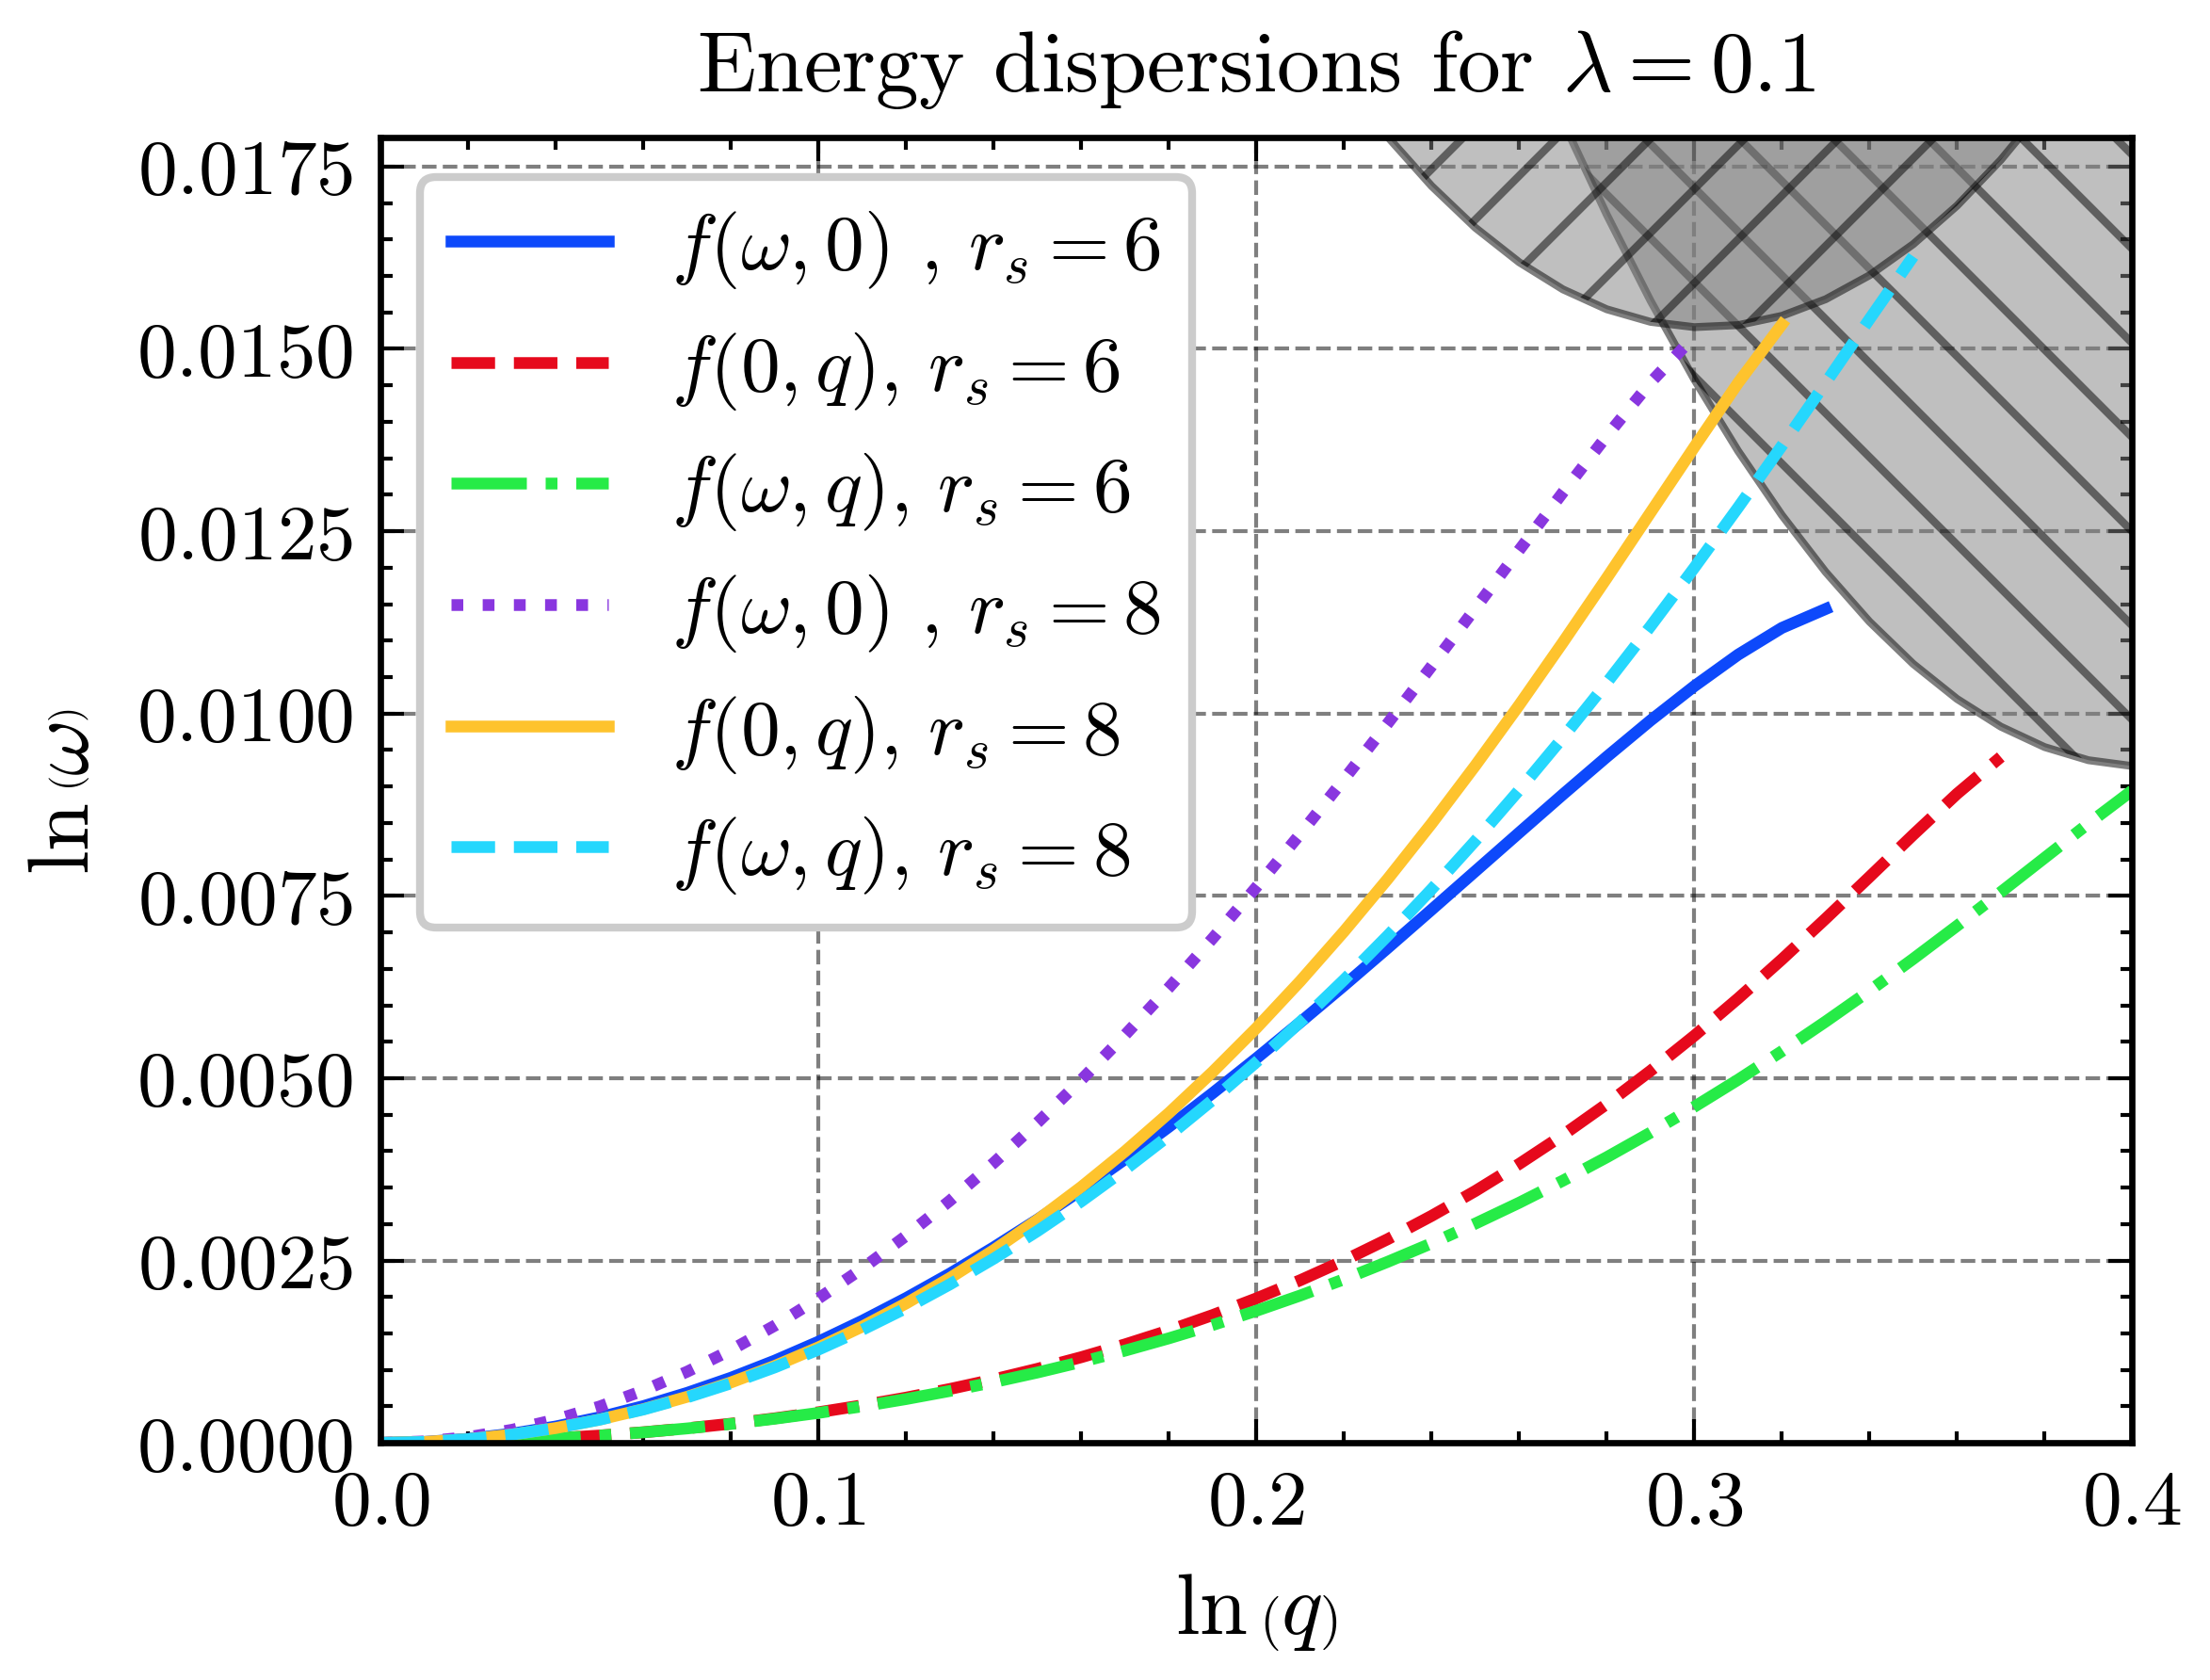

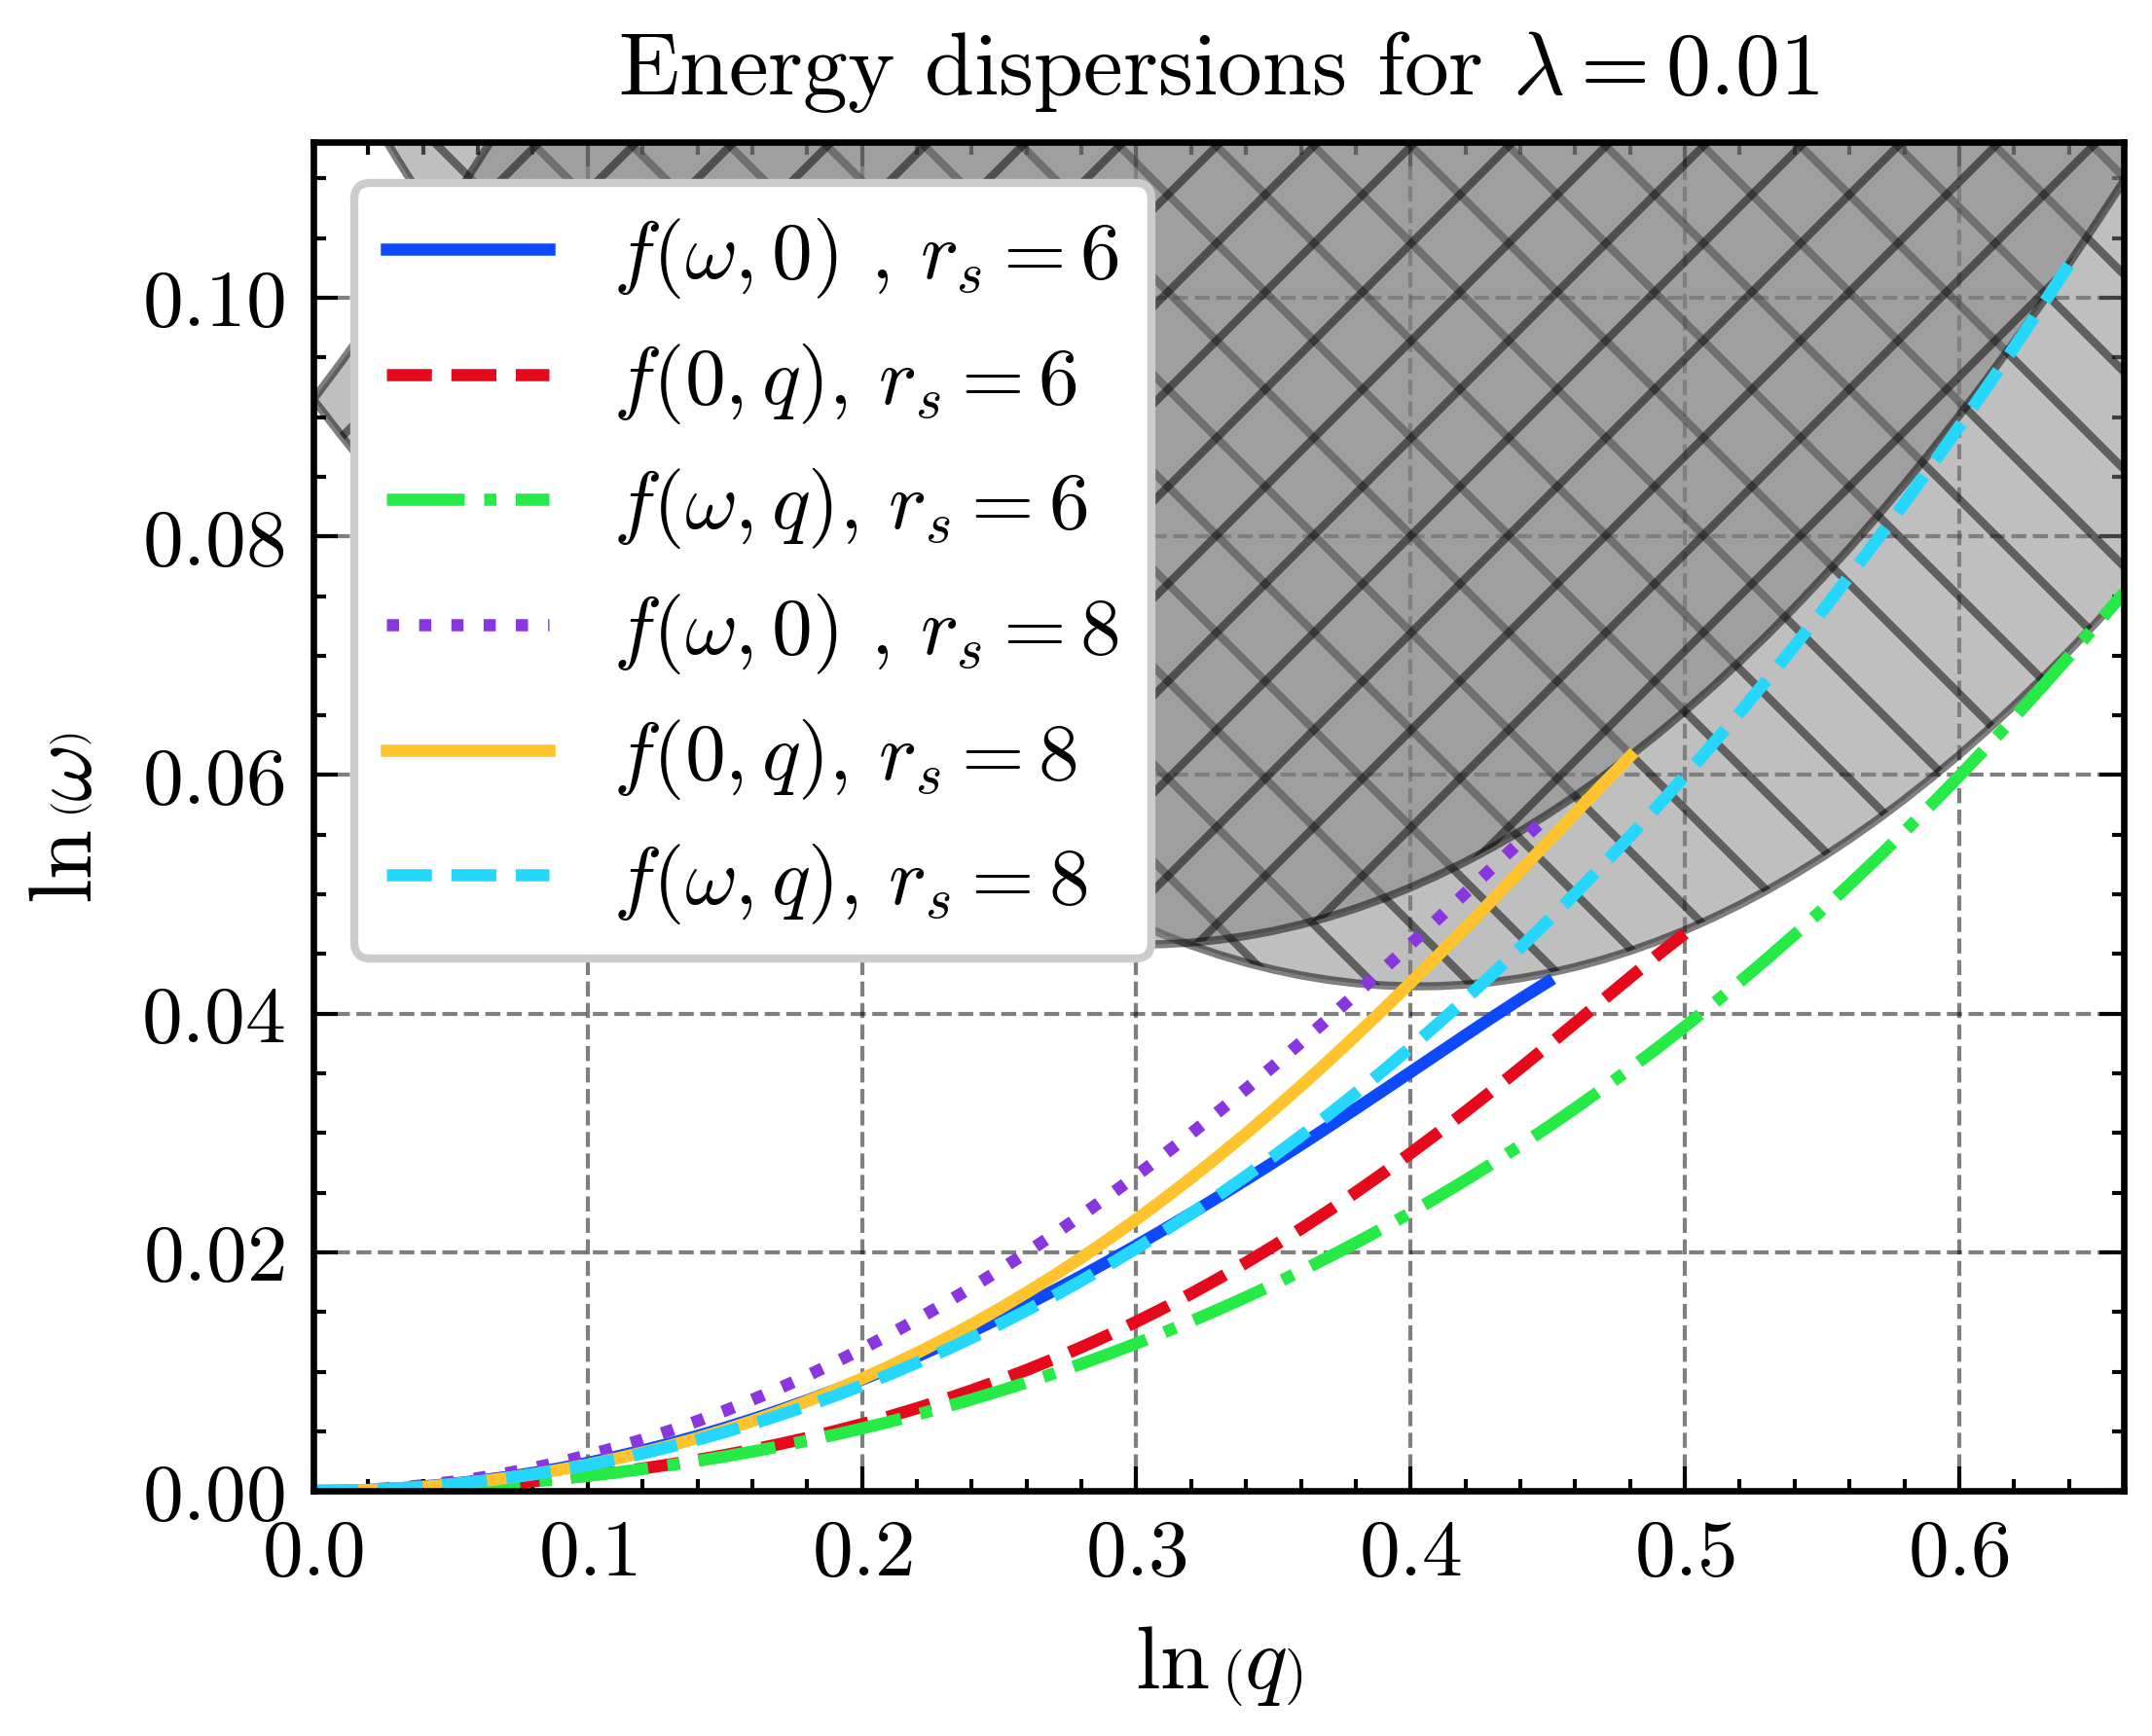

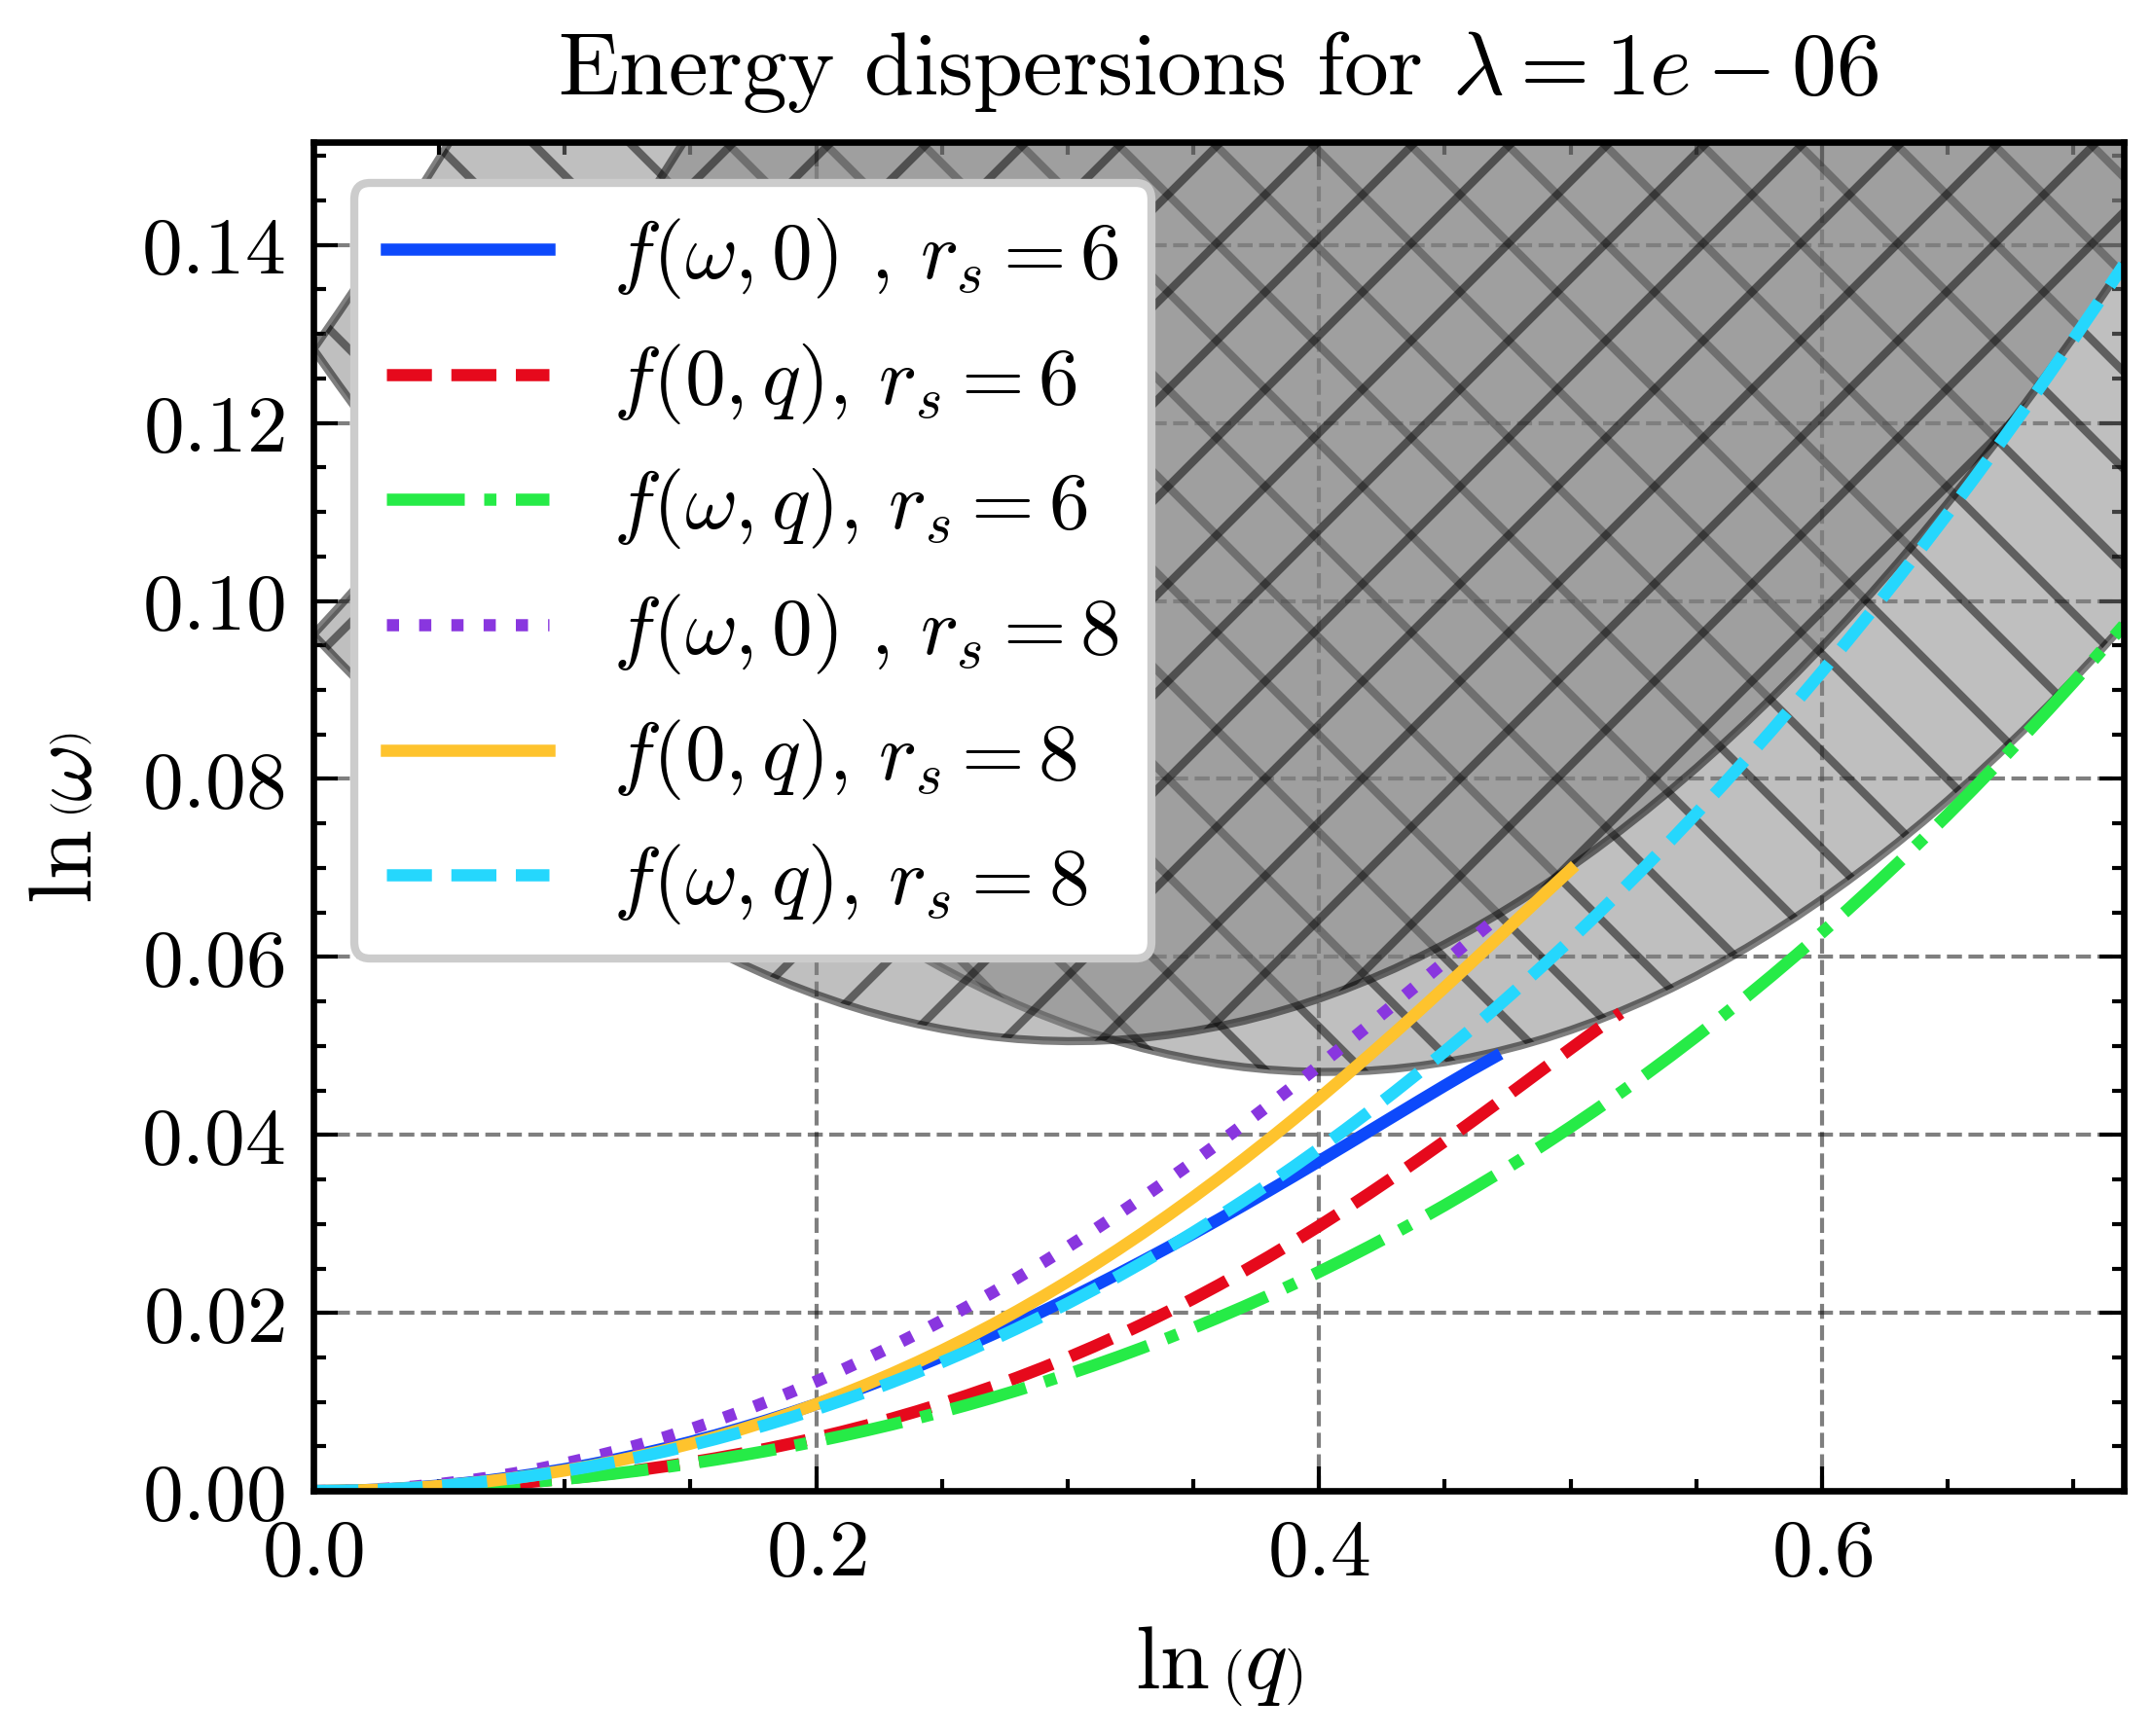

In [6]:
# Define the colors from the bright.mplstyle
colors = ["#0d49fb", "#e6091c", "#26eb47", "#8936df", "#fec32d", "#25d7fd"]

# Define the linestyles
linestyles = ['-', '--', '-.', ':', '-', '--']

# Create the cycler
custom_cycler = plt.cycler(color=colors) + plt.cycler(linestyle=linestyles)

# Apply the cycler to the axes
plt.rc('axes', prop_cycle=custom_cycler)


lams = [(0.1,"1.000e-01"),(0.01,"1.000e-02"),(1e-6,"1.000e-06")]
rs = [(4,"4.000"),(6,"6.000"),(8,"8.000")]

for lam,slam in lams:
    xmax =0
    ymax =0
    for r,sr in rs:
        if  r == 4:
            pass
        else:
            hatch = r"//"
            if r == 6:
                hatch = r"\\"
            data= np.loadtxt(datadir + f"/rs_{sr}_lambda_{slam}_pert_w.txt", comments='#', delimiter=",")
            x = data[:,0]
            y = data[:,1]
            plt.plot(x,y,label  = r'$f(\omega,0)$ , $r_s = $'+f"${r}$")
            xmax = max(xmax,x.max())
            ymax = max(ymax,y.max())
            
            data= np.loadtxt(datadir + f"/rs_{sr}_lambda_{slam}_pert_q.txt", comments='#', delimiter=",")
            x = data[:,0]
            y = data[:,1]
            plt.plot(x,y, label = r'$f(0,q)$, $r_s = $'+f"${r}$")
            xmax = max(xmax,x.max())
            ymax = max(ymax,y.max())
            
            data= np.loadtxt(datadir + f"/rs_{sr}_lambda_{slam}_stoner.txt", comments='#', delimiter=",")
            plt.fill_between(data[:,0],data[:,1],data[:,2],alpha = 0.5,facecolor='grey', hatch=hatch, edgecolor='k')
           
            data= np.loadtxt(datadir + f"/rs_{sr}_lambda_{slam}_pert.txt", comments='#', delimiter=",")
            x = data[:,0]
            y = data[:,1]
            plt.plot(x,y,label = r'$f(\omega,q)$, $r_s = $'+f"${r}$")
            xmax = max(xmax,x.max())
            ymax = max(ymax,y.max())
        
    plt.ylabel(r"$\ln\left(\omega\right)$")
    plt.xlabel(r"$\ln\left(q\right)$")
    plt.legend(loc="upper left")
    plt.title(f"Energy dispersions for $\\lambda = {lam}$")
    plt.ylim(0,ymax*1.1)
    plt.xlim(0,xmax)
    plt.savefig(f"plots/compare_{round(lam*100)}.pdf")
    plt.show()

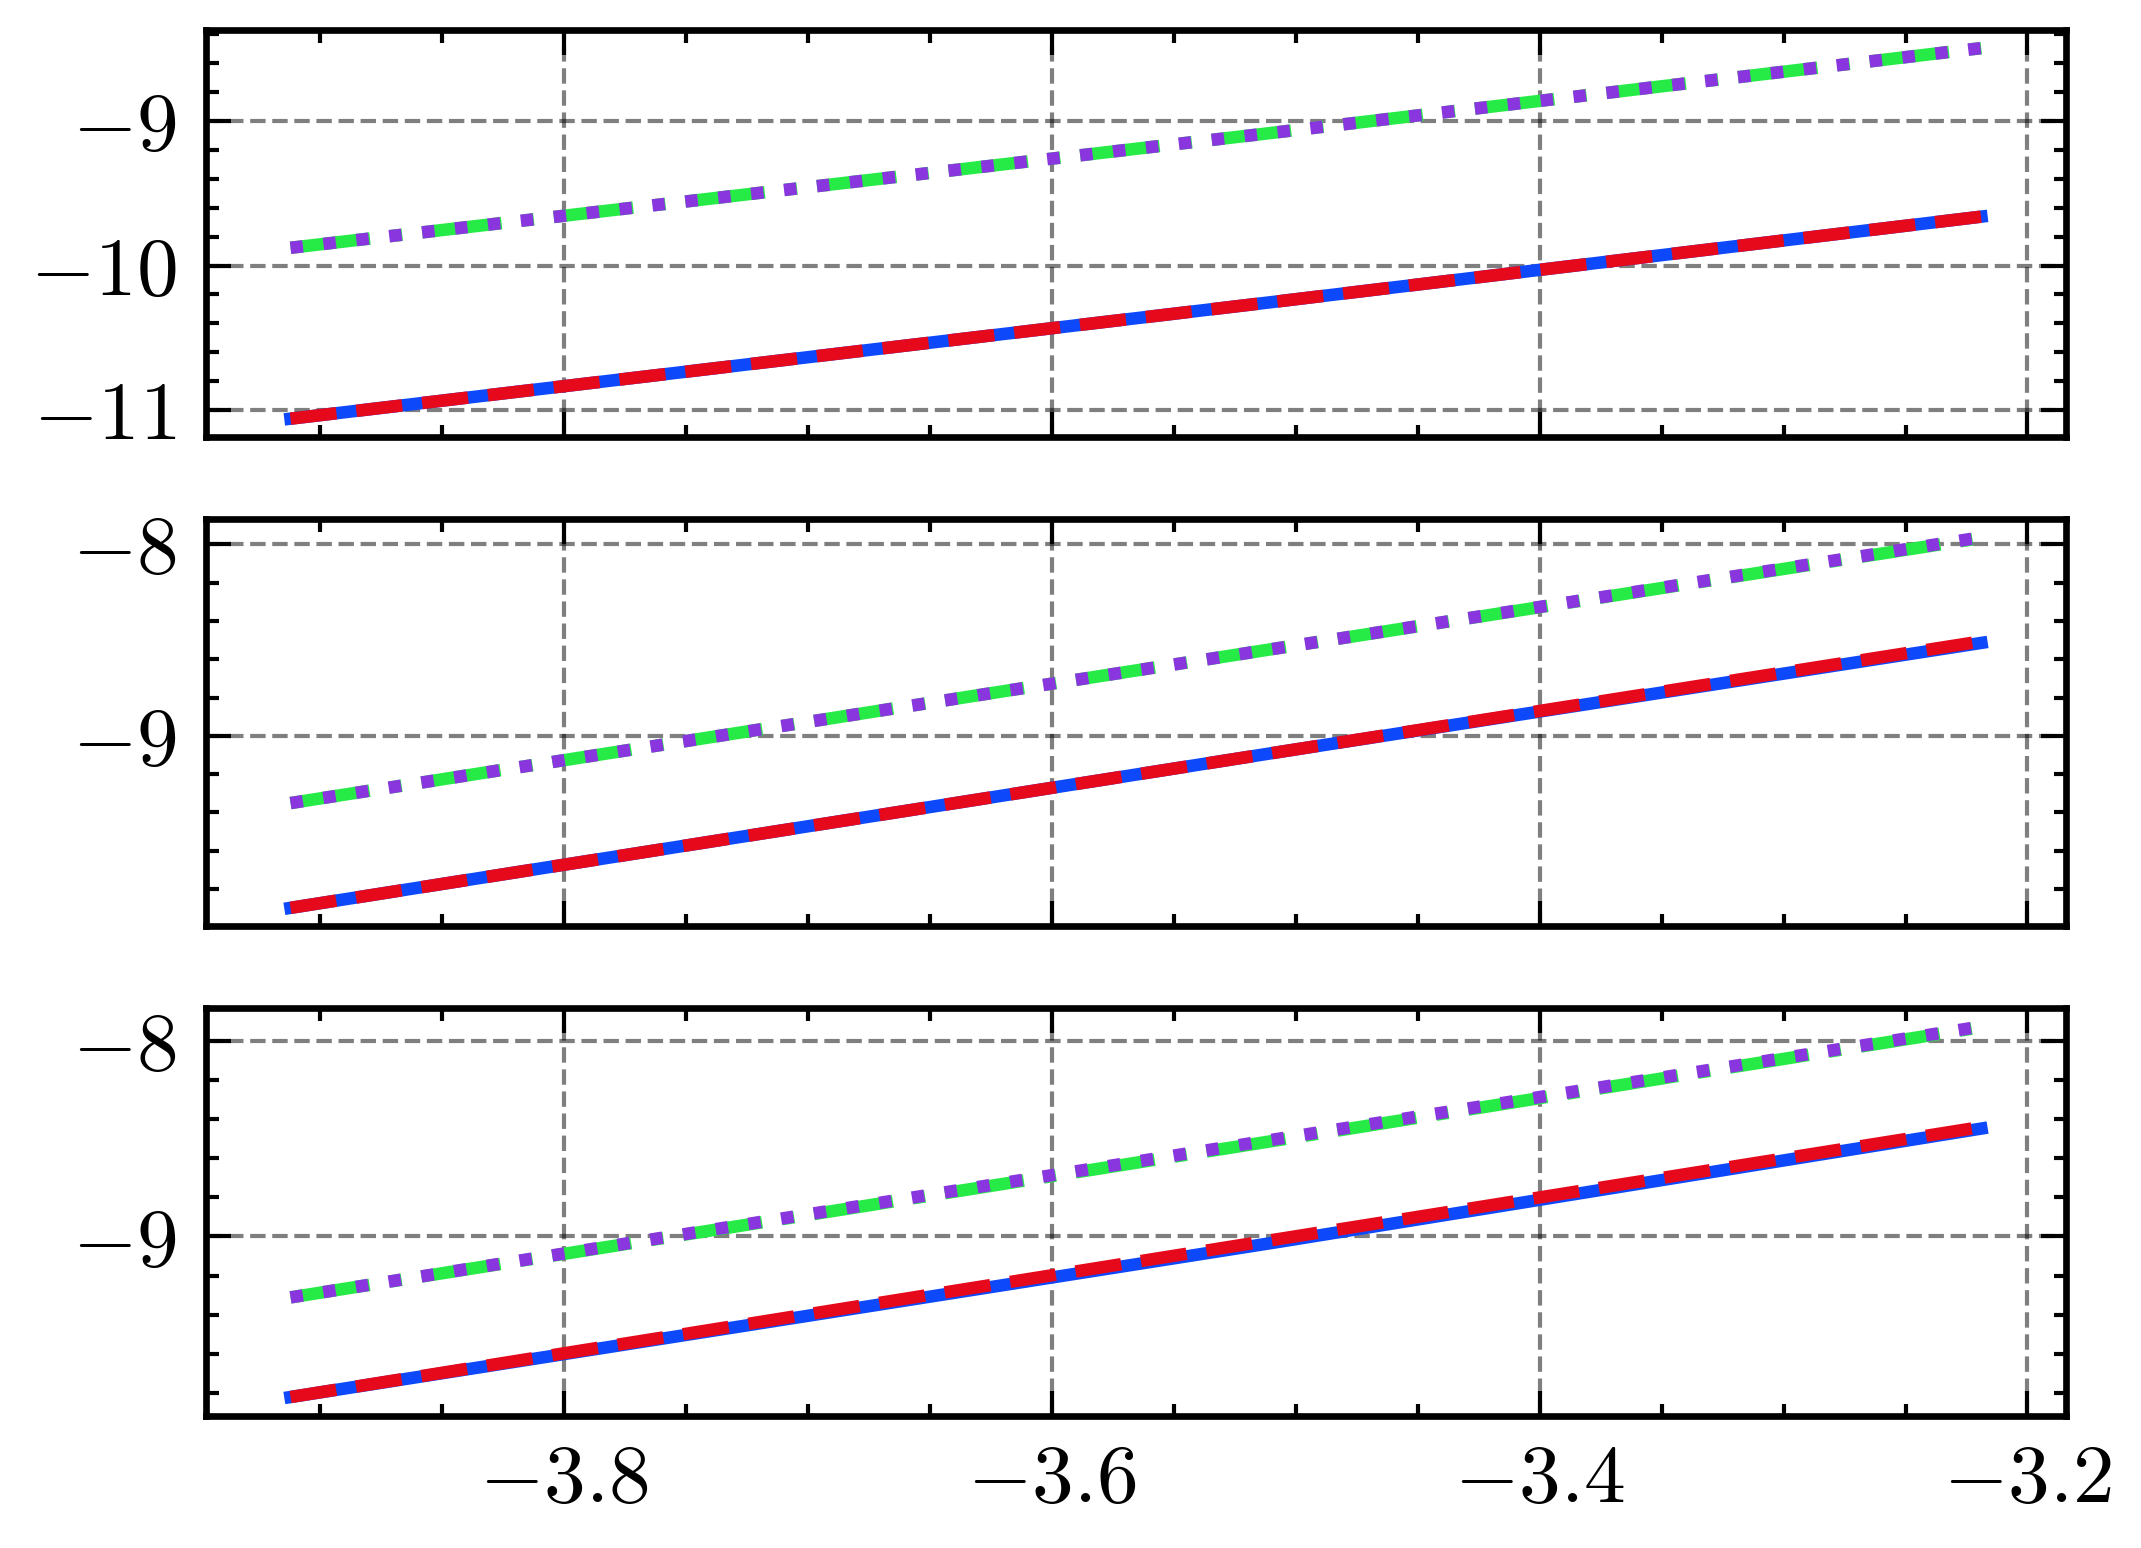

[(0.04143875517985655, -0.025161866648748123, 0.1, 6, '$f(\\omega,q)$'), (0.04143875517985655, -0.025161866648748123, 0.1, 6, '$f(0,q)$'), (0.12293280352904476, -0.023471595879284674, 0.1, 8, '$f(\\omega,q)$'), (0.12293280352904476, -0.023471595879284674, 0.1, 8, '$f(0,q)$'), (0.12416763779557524, -0.016766675511956566, 0.01, 6, '$f(\\omega,q)$'), (0.1294820168741104, -0.00025780520274001206, 0.01, 6, '$f(0,q)$'), (0.21487467411527197, -0.0007832329422578317, 0.01, 8, '$f(\\omega,q)$'), (0.21877809697903505, -0.004390444658615601, 0.01, 8, '$f(0,q)$'), (0.12679018885334745, -0.030816936415074443, 1e-06, 6, '$f(\\omega,q)$'), (0.13385836044521301, -0.003262606355060553, 1e-06, 6, '$f(0,q)$'), (0.2238231166646902, -0.007232048893083235, 1e-06, 8, '$f(\\omega,q)$'), (0.22932748053066646, -0.003776329678438716, 1e-06, 8, '$f(0,q)$')]


In [7]:
# spin stiffness
lams = [(0.1,"1.000e-01"),(0.01,"1.000e-02"),(1e-6,"1.000e-06")]
rs = [(6,"6.000"),(8,"8.000")]
D_pert=[]

fig,ax = plt.subplots(3,1,sharex=True)

for i,(lam,slam) in enumerate(lams):
    for r,sr in rs:
        for label,add in [(r"$f(\omega,q)$",""),(r"$f(0,q)$","_q")]:
            data= np.loadtxt(datadir + f"/rs_{sr}_lambda_{slam}_pert{add}.txt", comments='#', delimiter=",")
            if r!= 4:
                x = np.log(data[2:5,0])
                y = np.log(data[2:5,1])
                ax[i].plot(x,y,label =label)
                reg_res = linregress(x,y)
                D_pert += [(np.exp(reg_res.intercept), reg_res.stderr*reg_res.intercept,lam, r,label)]
    

plt.show()
print(D_pert)